In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

air_quality_data_who_path = 'Resources\World_Health_Organization\Air_Quality_Data_WHO.csv'
population_Vs_Depression_path = 'Resources\Global_Burden_of_Disease\Population_Vs_Depression.csv'

air_quality_data_who = pd.read_csv(air_quality_data_who_path)
population_Vs_Depression = pd.read_csv(population_Vs_Depression_path)

merged_data = pd.merge(air_quality_data_who, population_Vs_Depression, on=["Location","Year"], how="inner")
merged_data['Population'] = merged_data['Population'].astype(int)
merged_data['Nbr. Cases in Pop.'] = merged_data['Nbr. Cases in Pop.'].astype(int)

column_PM25 = "PM2.5 (μg/m3)"
column_NO2 = "NO2 (μg/m3)"
column_nbrcases = "Nbr. Cases in Pop."
column_percentprev = "Percent Prevalence"

merged_data

,WHO Region,Country Code,WHO Country Name,Location,Year,PM2.5 (μg/m3),NO2 (μg/m3),Reference,Age Group,Gender,Disorder,Population,Nbr. Cases in Pop.,Percent Prevalence
0,Region of the Americas,CAN,Canada,Cornwall,2015,6.90,9.96,Ontario Ministry of Environment and Climate Ch...,All Ages,both,Depressive disorders,554478,27569,4.97
1,Region of the Americas,CAN,Canada,Peterborough,2015,6.80,9.59,Ontario Ministry of Environment and Climate Ch...,All Ages,both,Depressive disorders,200734,9349,4.66
2,Region of the Americas,CAN,Canada,Southampton,2015,3.30,0.56,Prince Edward Island Department of Communities...,All Ages,both,Depressive disorders,243745,11591,4.76
3,European Region,GBR,United Kingdom,Southampton,2015,9.96,31.96,European Environment Agency (downloaded in 2021),All Ages,both,Depressive disorders,243745,11591,4.76
4,Region of the Americas,CAN,Canada,Surrey,2015,6.30,17.11,"Metro Vancouver Parks, Planning & Environment ...",All Ages,both,Depressive disorders,1173645,56677,4.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,European Region,GBR,United Kingdom,Portsmouth,2019,8.88,22.63,European Environment Agency (downloaded in 2021),All Ages,both,Depressive disorders,221122,10266,4.64
156,European Region,GBR,United Kingdom,Sheffield,2019,12.49,30.16,European Environment Agency (downloaded in 2021),All Ages,both,Depressive disorders,587808,27627,4.70
157,European Region,GBR,United Kingdom,Sunderland,2019,9.40,15.07,European Environment Agency (downloaded in 2021),All Ages,both,Depressive disorders,271892,13141,4.83
158,European Region,GBR,United Kingdom,Wigan,2019,9.56,19.28,European Environment Agency (downloaded in 2021),All Ages,both,Depressive disorders,336170,15985,4.76


In [18]:
#Checking for missing values
print(merged_data.isnull().sum())

WHO Region            0
Country Code          0
WHO Country Name      0
Location              0
Year                  0
PM2.5 (μg/m3)         0
NO2 (μg/m3)           0
Reference             0
Age Group             0
Gender                0
Disorder              0
Population            0
Nbr. Cases in Pop.    0
Percent Prevalence    0
dtype: int64


In [19]:
#Counting the number of unique regions, countries and cities

num_regions = merged_data["WHO Region"].nunique()
print("Number of WHO Regions: ", num_regions)
num_countries = merged_data["WHO Country Name"].nunique()
print("Number of Countries: ", num_countries)
num_cities = merged_data["Location"].nunique()
print("Number of Cities: ", num_cities)

Number of WHO Regions:  2
Number of Countries:  6
Number of Cities:  29


In [20]:
pm25_mean = merged_data[column_PM25].mean()
pm25_median = merged_data[column_PM25].median()
pm25_mode = merged_data[column_PM25].value_counts().idxmax()
pm25_skewness = merged_data[column_PM25].skew()
pm25_min = merged_data[column_PM25].min()  
pm25_max = merged_data[column_PM25].max()  

no2_mean = merged_data[column_NO2].mean()
no2_median = merged_data[column_NO2].median()
no2_mode = merged_data[column_NO2].value_counts().idxmax()
no2_skewness = merged_data[column_NO2].skew()
no2_min = merged_data[column_NO2].min()
no2_max = merged_data[column_NO2].max()

nbrcases_mean = merged_data[column_nbrcases].mean()
nbrcases_median = merged_data[column_nbrcases].median()
nbrcases_mode = merged_data[column_nbrcases].value_counts().idxmax()
nbrcases_skewness = merged_data[column_nbrcases].skew()
nbrcases_min = merged_data[column_nbrcases].min()  
nbrcases_max = merged_data[column_nbrcases].max()  

percentcases_mean = merged_data[column_percentprev].mean()
percentcases_median = merged_data[column_percentprev].median()
percentcases_mode = merged_data[column_percentprev].value_counts().idxmax()
percentcases_skewness = merged_data[column_percentprev].skew()
percentcases_min = merged_data[column_percentprev].min()
percentcases_max = merged_data[column_percentprev].max()

summary_dict = {
    "PM2.5": {
        "Mean": pm25_mean,
        "Median": pm25_median,
        "Mode": pm25_mode,
        "Min": pm25_min,
        "Max": pm25_max,
        "Skewness": pm25_skewness
        
    },
    "NO2": {
        "Mean": no2_mean,
        "Median": no2_median,
        "Mode": no2_mode,
        "Min": no2_min,
        "Max": no2_max,
        "Skewness": no2_skewness       
    },
    
    "Number Cases": {
        "Mean": nbrcases_mean,
        "Median": nbrcases_median,
        "Mode": nbrcases_mode,
        "Min": nbrcases_min,
        "Max": nbrcases_max,
        "Skewness": nbrcases_skewness
        
    },
    "Percent Cases": {
        "Mean": percentcases_mean,
        "Median": percentcases_median,
        "Mode": percentcases_mode,
        "Min": percentcases_min,
        "Max": percentcases_max,
        "Skewness": percentcases_skewness
        
    }
}

summary_df = pd.DataFrame(summary_dict)
summary_df.round(2)

,PM2.5,NO2,Number Cases,Percent Cases
Mean,10.87,25.28,39920.53,4.33
Median,10.50,24.58,14042.94,4.41
Mode,6.00,9.00,10688.03,4.29
Min,3.30,0.00,6222.80,1.93
Max,26.68,83.94,333976.21,5.29
Skewness,1.53,1.43,3.29,-1.34


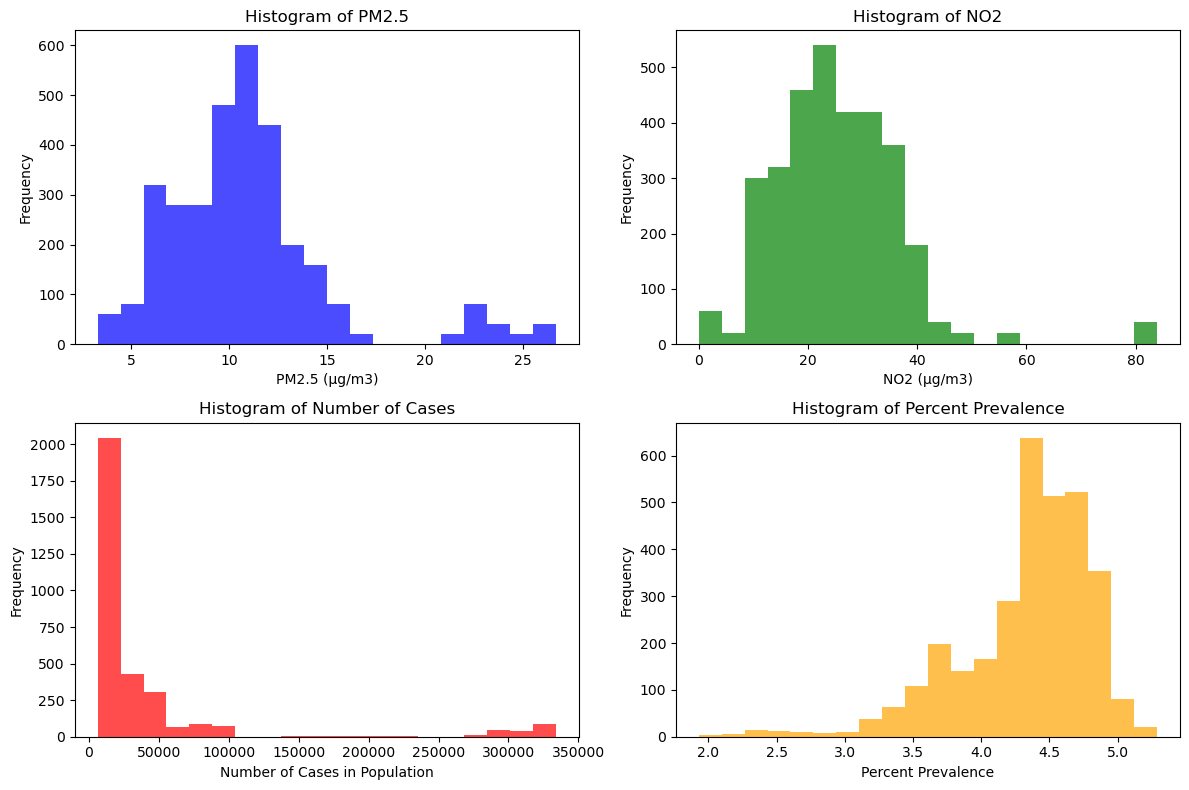

In [21]:
#Examination of data for normal distribution
plt.figure(figsize=(12, 8))

# Plot for PM2.5
plt.subplot(2, 2, 1)
plt.hist(merged_data[column_PM25], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of PM2.5')
plt.xlabel('PM2.5 (μg/m3)')
plt.ylabel('Frequency')

# Plot for NO2
plt.subplot(2, 2, 2)
plt.hist(merged_data[column_NO2], bins=20, color='green', alpha=0.7)
plt.title('Histogram of NO2')
plt.xlabel('NO2 (μg/m3)')
plt.ylabel('Frequency')

# Plot for Number Cases
plt.subplot(2, 2, 3)
plt.hist(merged_data[column_nbrcases], bins=20, color='red', alpha=0.7)
plt.title('Histogram of Number of Cases')
plt.xlabel('Number of Cases in Population')
plt.ylabel('Frequency')

# Plot for Percent Cases
plt.subplot(2, 2, 4)
plt.hist(merged_data[column_percentprev], bins=20, color='orange', alpha=0.7)
plt.title('Histogram of Percent Prevalence')
plt.xlabel('Percent Prevalence')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

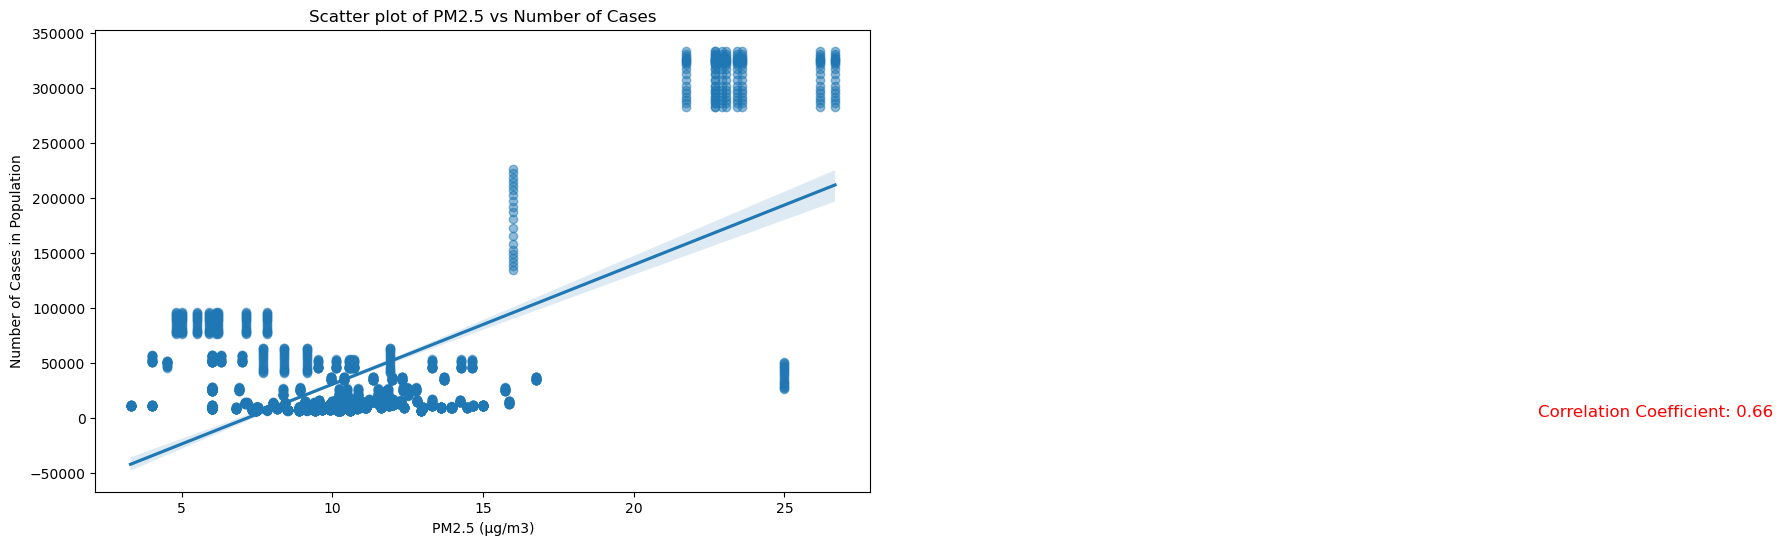

In [24]:
import seaborn as sns
import scipy.stats as stats

# Calculate correlation coefficient
correlation_coefficient = merged_data[[column_PM25, column_nbrcases]].corr().iloc[0, 1]

# Plot scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=column_PM25, y=column_nbrcases, data=merged_data, scatter_kws={'alpha':0.5})
plt.title('Scatter plot of PM2.5 vs Number of Cases')
plt.xlabel('PM2.5 (μg/m3)')
plt.ylabel('Number of Cases in Population')

# Add correlation coefficient to the plot
plt.text(50, 1500, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12, color='red')

plt.show()
